In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_64539_Z')

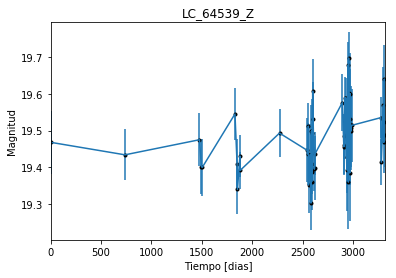

In [2]:
data = np.genfromtxt('LC_64539_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_64539_Z')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

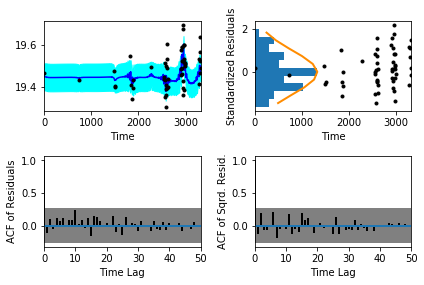

In [5]:
sample.assess_fit()

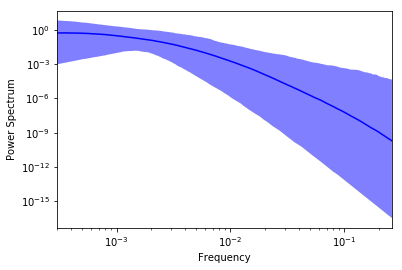

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_64539_Z')

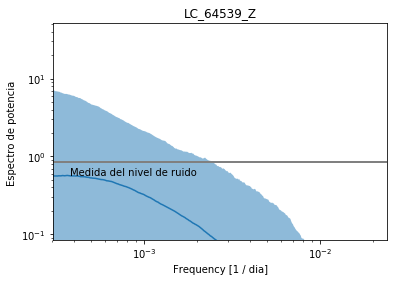

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_64539_Z')

Text(0.5,1,'Prediccion , valor esperado LC_64539_Z')

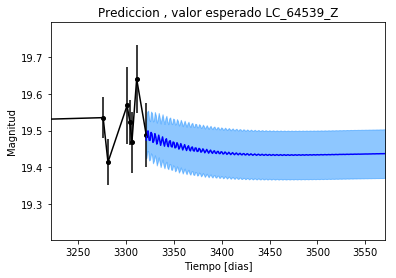

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_64539_Z')

Text(0.5,1,'Prediccion, Caminos simulados  LC_64539_z')

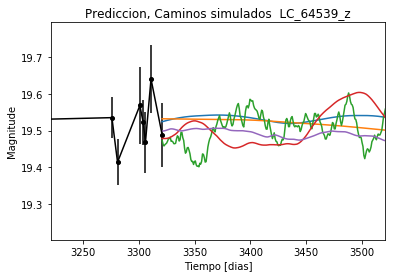

In [13]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_64539_z')

Text(0.5,1,'LC_64539_Z')

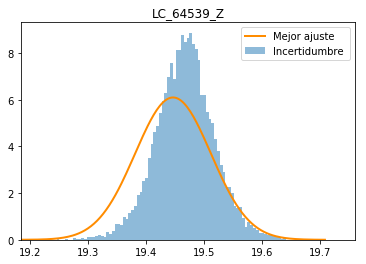

In [14]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_64539_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_64539_Z')

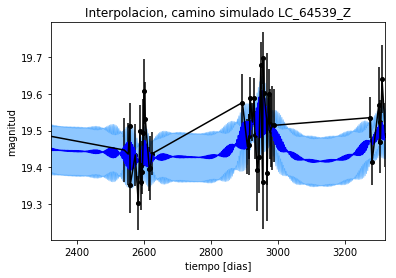

In [15]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_64539_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_64539_Z')

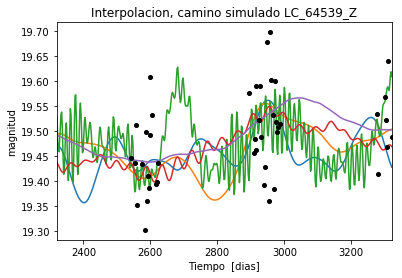

In [16]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_64539_Z')

In [17]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [18]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 777.600796364
Median: 0.0056153642193
Standard deviation: 0.0962925253407
68% credibility interval: [ 0.00067752  0.08618131]
95% credibility interval: [  3.45277844e-04   3.83478683e-01]
99% credibility interval: [  3.10176926e-04   4.98138579e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 956.776711995
Median: 0.00183111260632
Standard deviation: 0.0457406549099
68% credibility interval: [ 0.00048848  0.02074687]
95% credibility interval: [ 0.00032172  0.14650869]
99% credibility interval: [  3.05380550e-04   3.09108661e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 366.81436597
Median: 0.0165623513602
Standard 

In [19]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1452.39787106
Median: 83.089843124
Standard deviation: 1.50466514583
68% credibility interval: [ 81.39114274  84.04400654]
95% credibility interval: [ 78.87344856  84.59795081]
99% credibility interval: [ 76.95346822  84.85953266]


In [20]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 587.966485631
Median: 0.424404975364
Standard deviation: 1.08434939842
68% credibility interval: [ 0.05035032  2.04125724]
95% credibility interval: [ 0.01467551  3.62239798]
99% credibility interval: [ 0.01033699  5.10178097]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 775.271747404
Median: 0.173146744858
Standard deviation: 2.32384606831
68% credibility interval: [ 0.00655315  2.50623518]
95% credibility interval: [  4.74085461e-0

In [21]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 506.501922394
Median: 5.37584389222e-22
Standard deviation: 1.20180886921e+140
68% credibility interval: [  1.06398761e-89   7.33131859e+43]
95% credibility interval: [  1.08172994e-128   6.27615212e+129]
99% credibility interval: [  5.54230055e-155   1.07130817e+140]


In [22]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1990.12903828
Median: 19.4700021218
Standard deviation: 0.0283058324794
68% credibility interval: [ 19.44468112  19.49342024]
95% credibility interval: [ 19.4116511   19.52335576]
99% credibility interval: [ 19.37720729  19.55562752]


In [23]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 363.665351045
Median: 0.00620010857421
Standard deviation: 0.127925002265
68% credibility interval: [ 0.          0.20309696]
95% credibility interval: [ 0.          0.45590838]
99% credibility interval: [ 0.          0.51097568]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 363.665351045
Median: 0.00620010857421
Standard deviation: 0.127925002265
68% credibility interval: [ 0.          0.20309696]
95% credibility interval: [ 0.          0.45590838]
99% credibility interval: [ 0.          0.51097568]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 5865.75384365
Median: 0.0
Standard deviation: 0.00320049293825
68% c

In [24]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1452.39787106
Median: 83.089843124
Standard deviation: 1.50466514583
68% credibility interval: [ 81.39114274  84.04400654]
95% credibility interval: [ 78.87344856  84.59795081]
99% credibility interval: [ 76.95346822  84.85953266]


In [25]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1794.6047326
Median: 0.0027583620525
Standard deviation: 0.00391862128411
68% credibility interval: [ 0.00136599  0.00573849]
95% credibility interval: [ 0.0006603   0.01307001]
99% credibility interval: [ 0.00037299  0.02383543]


In [26]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 3013.56510083
Median: 1.00123110573
Standard deviation: 0.147552168039
68% credibility interval: [ 0.86509869  1.14919198]
95% credibility interval: [ 0.76060982  1.33890411]
99% credibility interval: [ 0.70752609  1.48798195]


In [27]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 963.850098471
Median: 4.87477620591e-06
Standard deviation: 0.00910097400305
68% credibility interval: [  3.71370650e-48   6.04716315e-04]
95% credibility interval: [  4.47624644e-135   1.26397599e-002]
99% credibility interval: [  3.46261253e-144   4.34757554e-002]


In [28]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 777.600796364
Median: (-0.0352823739572-0.531073736544j)
Standard deviation: 1.00603699148
68% credibility interval: [-0.54149317-0.53152294j -0.00425701-0.00448593j]
95% credibility interval: [ -2.40946763e+00+0.j         -2.16944468e-03-0.0079011j]
99% credibility interval: [ -3.12989700e+00+0.j        -1.94889911e-03-0.010561j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 956.776711995
Median: (-0.0115052198238+0j)
Standard deviation: 0.853612145657
68% credibility interval: [-0.13035646+0.06978288j -0.00306921+0.j        ]
95% credibility interval: [-0.92054123 +2.53930205e+00j -0.00202141 +3.72900844e-04j]
99% credibility interval: [ -1.94218700e+00+0.58805073j  -1.91876259e-03+0.02195532j]
Posterior summary fo